# Importing Necessary Libraries

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Loading The Dataset

In [2]:
data = pd.read_excel("C:\\Users\\Anish Dutta\\Downloads\\Data_Train_lyst6947.xlsx")
data.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302


# Handling Missing Values

In [3]:
(data.isnull().sum()/data.shape[0])*100

Airline            0.000000
Date_of_Journey    0.000000
Source             0.000000
Destination        0.000000
Route              0.009361
Dep_Time           0.000000
Arrival_Time       0.000000
Duration           0.000000
Total_Stops        0.009361
Additional_Info    0.000000
Price              0.000000
dtype: float64

In [4]:
data.dropna(inplace=True)
data.isnull().sum()

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              0
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        0
Additional_Info    0
Price              0
dtype: int64

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10682 entries, 0 to 10682
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Airline          10682 non-null  object
 1   Date_of_Journey  10682 non-null  object
 2   Source           10682 non-null  object
 3   Destination      10682 non-null  object
 4   Route            10682 non-null  object
 5   Dep_Time         10682 non-null  object
 6   Arrival_Time     10682 non-null  object
 7   Duration         10682 non-null  object
 8   Total_Stops      10682 non-null  object
 9   Additional_Info  10682 non-null  object
 10  Price            10682 non-null  int64 
dtypes: int64(1), object(10)
memory usage: 1001.4+ KB


#  Handling Date and Time Variables

In [6]:
data['Journey_Day'] = pd.to_datetime(data["Date_of_Journey"]).dt.day

In [7]:
data['Journey_Month'] = pd.to_datetime(data['Date_of_Journey']).dt.month

In [8]:
data.drop(['Date_of_Journey'],axis=1,inplace=True)

In [9]:
data['Dep_Hour'] = pd.to_datetime(data['Dep_Time']).dt.hour

In [10]:
data['Dep_Min'] = pd.to_datetime(data['Dep_Time']).dt.minute

In [11]:
data.drop(['Dep_Time'],axis=1,inplace=True)

In [12]:
data['Arr_Hour'] = pd.to_datetime(data['Arrival_Time']).dt.hour

In [13]:
data['Arr_Min'] = pd.to_datetime(data['Arrival_Time']).dt.minute

In [14]:
data.drop(['Arrival_Time'],axis=1,inplace=True)

In [15]:
data.head()

,Airline,Source,Destination,Route,Duration,Total_Stops,Additional_Info,Price,Journey_Day,Journey_Month,Dep_Hour,Dep_Min,Arr_Hour,Arr_Min
0,IndiGo,Banglore,New Delhi,BLR → DEL,2h 50m,non-stop,No info,3897,24,3,22,20,1,10
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,7h 25m,2 stops,No info,7662,5,1,5,50,13,15
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,19h,2 stops,No info,13882,6,9,9,25,4,25
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,5h 25m,1 stop,No info,6218,5,12,18,5,23,30
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,4h 45m,1 stop,No info,13302,3,1,16,50,21,35


In [16]:
duration = list(data["Duration"])

for i in range(len(duration)):
    if len(duration[i].split()) !=2:
        if "h" in duration[i]:
            duration[i] = duration[i].strip() +  " 0m"
        else:
            duration[i] = "0h " + duration[i]
                

duration_hours = []
duration_mins = [] 

for i in range(len(duration)):
    duration_hours.append(int(duration[i].split(sep="h")[0]))
    duration_mins.append(int(duration[i].split(sep="m")[0].split()[-1]))



In [17]:
data["Duration_Hours"] = duration_hours
data["Duration_Mins"] = duration_mins

In [18]:
data.drop(['Duration'],axis=1,inplace=True)

In [19]:
data.head()

,Airline,Source,Destination,Route,Total_Stops,Additional_Info,Price,Journey_Day,Journey_Month,Dep_Hour,Dep_Min,Arr_Hour,Arr_Min,Duration_Hours,Duration_Mins
0,IndiGo,Banglore,New Delhi,BLR → DEL,non-stop,No info,3897,24,3,22,20,1,10,2,50
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,2 stops,No info,7662,5,1,5,50,13,15,7,25
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,2 stops,No info,13882,6,9,9,25,4,25,19,0
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,1 stop,No info,6218,5,12,18,5,23,30,5,25
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,1 stop,No info,13302,3,1,16,50,21,35,4,45


# Handling Categorical Data
Airline, Source, Destination, Route, Total_Stops, Additional_info are the categorical variables we have in our data. Let’s handle each one by one.

# AIRLINE 

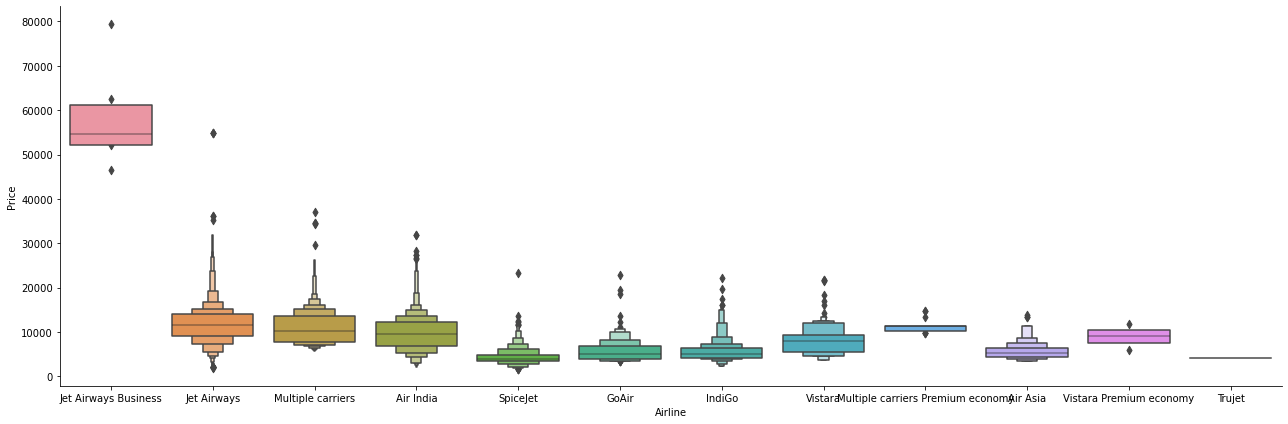

In [20]:
sns.catplot(y="Price",x="Airline", data=data.sort_values("Price",ascending=False),kind="boxen",height=6,aspect=3)
plt.show()

In [21]:
Airline = data[["Airline"]]
Airline = pd.get_dummies(Airline,drop_first=True)
Airline.head()

,Airline_Air India,Airline_GoAir,Airline_IndiGo,Airline_Jet Airways,Airline_Jet Airways Business,Airline_Multiple carriers,Airline_Multiple carriers Premium economy,Airline_SpiceJet,Airline_Trujet,Airline_Vistara,Airline_Vistara Premium economy
0,0,0,1,0,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,0
2,0,0,0,1,0,0,0,0,0,0,0
3,0,0,1,0,0,0,0,0,0,0,0
4,0,0,1,0,0,0,0,0,0,0,0


# SOURCE

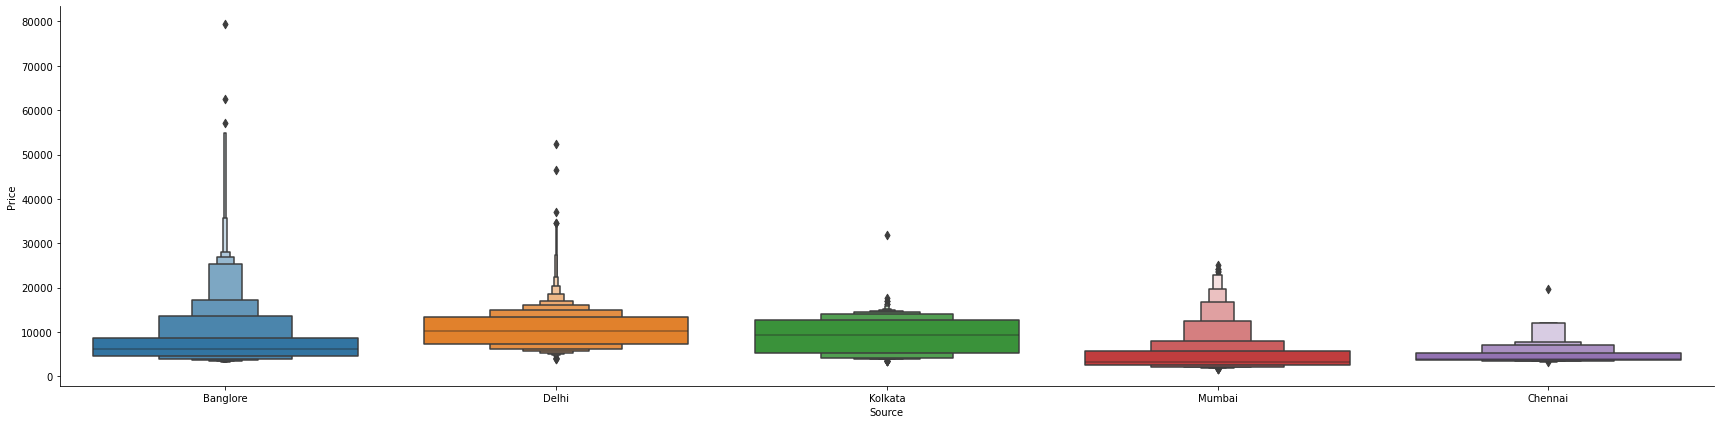

In [22]:
sns.catplot(y="Price",x="Source", data=data.sort_values("Price",ascending=False),kind="boxen",height=6,aspect=4)
plt.show()

In [23]:
Source = data[["Source"]]
Source = pd.get_dummies(Source,drop_first=True)
Source.head()

,Source_Chennai,Source_Delhi,Source_Kolkata,Source_Mumbai
0,0,0,0,0
1,0,0,1,0
2,0,1,0,0
3,0,0,1,0
4,0,0,0,0


# DESTINATION

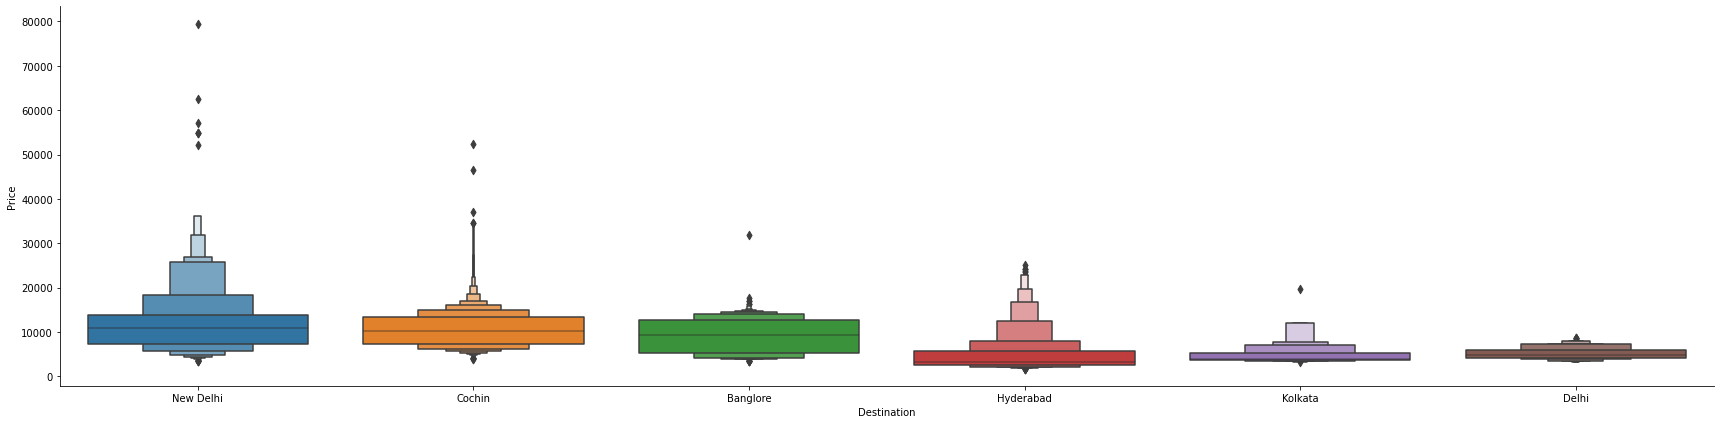

In [24]:
sns.catplot(y="Price",x="Destination", data=data.sort_values("Price",ascending=False),kind="boxen",height=6,aspect=4)
plt.show()

In [25]:
Destination = data[["Destination"]]
Destination = pd.get_dummies(Destination,drop_first=True)
Destination.head()

,Destination_Cochin,Destination_Delhi,Destination_Hyderabad,Destination_Kolkata,Destination_New Delhi
0,0,0,0,0,1
1,0,0,0,0,0
2,1,0,0,0,0
3,0,0,0,0,0
4,0,0,0,0,1


# Route variable

Route variable represents the path of the journey. Since the ‘Total_Stops’ variable captures the information if the flight is direct or connected so I have decided to drop this variable.

In [26]:
data.drop(["Route"], axis = 1, inplace = True)

In [27]:
data["Total_Stops"].unique()

array(['non-stop', '2 stops', '1 stop', '3 stops', '4 stops'],
      dtype=object)

In [28]:
data.replace({"non-stop": 0, "1 stop": 1, "2 stops": 2, "3 stops": 3, "4 stops": 4}, inplace = True)

# ADDITIONAL INFO 

In [29]:
data.Additional_Info.unique()

array(['No info', 'In-flight meal not included',
       'No check-in baggage included', '1 Short layover', 'No Info',
       '1 Long layover', 'Change airports', 'Business class',
       'Red-eye flight', '2 Long layover'], dtype=object)

In [30]:
data['Additional_Info'].replace({"No info": 'No Info'}, inplace = True)

In [31]:
Add_info = data[["Additional_Info"]]
Add_info = pd.get_dummies(Add_info, drop_first = True)
Add_info.head()

,Additional_Info_1 Short layover,Additional_Info_2 Long layover,Additional_Info_Business class,Additional_Info_Change airports,Additional_Info_In-flight meal not included,Additional_Info_No Info,Additional_Info_No check-in baggage included,Additional_Info_Red-eye flight
0,0,0,0,0,0,1,0,0
1,0,0,0,0,0,1,0,0
2,0,0,0,0,0,1,0,0
3,0,0,0,0,0,1,0,0
4,0,0,0,0,0,1,0,0


# CONCAT ALL THE DATASETS(DATA+AIRLINE+DESTINATION+ADD_INFO+SOURCE)

In [32]:
data = pd.concat([data, Airline, Source, Destination,Add_info], axis = 1)
data.drop(["Airline", "Source", "Destination","Additional_Info"], axis = 1, inplace = True)

In [33]:
data.shape

(10682, 38)

In [34]:
data.head()

,Total_Stops,Price,Journey_Day,Journey_Month,Dep_Hour,Dep_Min,Arr_Hour,Arr_Min,Duration_Hours,Duration_Mins,...,Destination_Kolkata,Destination_New Delhi,Additional_Info_1 Short layover,Additional_Info_2 Long layover,Additional_Info_Business class,Additional_Info_Change airports,Additional_Info_In-flight meal not included,Additional_Info_No Info,Additional_Info_No check-in baggage included,Additional_Info_Red-eye flight
0,0,3897,24,3,22,20,1,10,2,50,...,0,1,0,0,0,0,0,1,0,0
1,2,7662,5,1,5,50,13,15,7,25,...,0,0,0,0,0,0,0,1,0,0
2,2,13882,6,9,9,25,4,25,19,0,...,0,0,0,0,0,0,0,1,0,0
3,1,6218,5,12,18,5,23,30,5,25,...,0,0,0,0,0,0,0,1,0,0
4,1,13302,3,1,16,50,21,35,4,45,...,0,1,0,0,0,0,0,1,0,0


# MODEL BUILDING

In [35]:
x=data.drop('Price',axis=1)
y=data['Price']
#train-test split
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 42)

In [36]:
from xgboost import XGBRegressor
model =  XGBRegressor()
model.fit(x_train,y_train)

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, enable_categorical=False,
             gamma=0, gpu_id=-1, importance_type=None,
             interaction_constraints='', learning_rate=0.300000012,
             max_delta_step=0, max_depth=6, min_child_weight=1, missing=nan,
             monotone_constraints='()', n_estimators=100, n_jobs=8,
             num_parallel_tree=1, predictor='auto', random_state=0, reg_alpha=0,
             reg_lambda=1, scale_pos_weight=1, subsample=1, tree_method='exact',
             validate_parameters=1, verbosity=None)

In [37]:
y_pred =  model.predict(x_test)
print('Training Score :',model.score(x_train, y_train))
print('Test Score     :',model.score(x_test, y_test))

Training Score : 0.9713846298756752
Test Score     : 0.8953614831599468


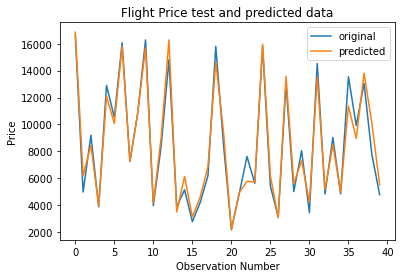

In [38]:
number_of_observations=40

x_ax = range(len(y_test[:number_of_observations]))

plt.plot(x_ax, y_test[:number_of_observations], label="original")

plt.plot(x_ax, y_pred[:number_of_observations], label="predicted")

plt.title("Flight Price test and predicted data")

plt.xlabel('Observation Number')

plt.ylabel('Price')

plt.legend()

plt.show()

In [39]:
pred_values = pd.DataFrame({'Actual':y_test,'Predicted':y_pred})

In [40]:
pred_values

,Actual,Predicted
6075,16655,16860.281250
3544,4959,6191.449219
9291,9187,8429.457031
5032,3858,3953.845703
2483,12898,12079.133789
...,...,...
9797,7408,11009.011719
9871,4622,5343.082520
10063,7452,7238.544434
8802,8824,8349.491211


# CONCLUSION

Hence, at the end, we were successfully able to train our regression model ‘XGBRegressor’ to predict the flights of prices